# Implementing QAOA using Max-Cut Problem


Let's implement QAOA for solving the Max-Cut problem using Qiskit. The Max-Cut problem is a classical graph optimization problem where we try to partition the vertices of a graph into two sets such that the number of edges between the sets is maximized.

### Steps for Implementing QAOA for the Max-Cut Problem:

1. Graph Definition: We'll start by defining a simple graph for which we want to solve the Max-Cut problem.
2. Formulate the Max-Cut as a Cost Hamiltonian: The problem will be encoded as a cost Hamiltonian that QAOA will try to minimize.
3. QAOA Circuit: Construct the QAOA circuit with alternating applications of cost and mixer Hamiltonians.
4. Classical Optimization: Use a classical optimizer to find the best parameters 𝛾 and 𝛽 that minimize the expected value of the cost function.
5. Result Interpretation: The output bitstring represents the partition of the graph.

### Implementation in Qiskit

C:\Users\cwq\AppData\Local\Temp\ipykernel_50256\3255689052.py:37: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Max-Cut solution: [0. 1. 0. 0.]
Optimal value (cut size): 3.0


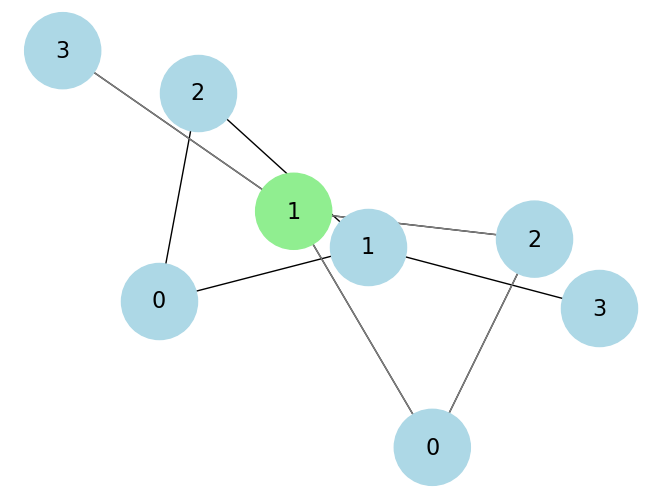

In [11]:
import networkx as nx
import numpy as np
from qiskit import QuantumCircuit
from qiskit_algorithms import QAOA
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms.optimizers import COBYLA
from qiskit_optimization.problems import QuadraticProgram
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler

# Create a simple graph for Max-Cut
def create_graph():
    G = nx.Graph()
    G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3)])
    return G

# Draw the graph
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=16, font_color='black')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Convert the Max-Cut problem to Qiskit's QuadraticProgram
def get_maxcut_quadratic_program(G):
    num_nodes = len(G.nodes)
    maxcut = Maxcut(G)
    quadratic_program = maxcut.to_quadratic_program()
    return quadratic_program

# Solve Max-Cut using QAOA
def solve_maxcut_with_qaoa(quadratic_program):
    sampler = Sampler()
    
    # Set the seed for reproducibility
    algorithm_globals.random_seed = 42

    # Initialize COBYLA optimizer and QAOA algorithm
    optimizer = COBYLA()  # Correctly instantiate the COBYLA optimizer
    qaoa = QAOA(sampler=sampler, optimizer=optimizer, reps=1)  # reps is the depth (p) of QAOA
    
    # Use MinimumEigenOptimizer to wrap QAOA
    max_eigen_optimizer = MinimumEigenOptimizer(qaoa)
    
    # Solve the Max-Cut problem
    result = max_eigen_optimizer.solve(quadratic_program)
    
    return result

# Visualize the solution
def visualize_solution(G, solution):
    pos = nx.spring_layout(G)
    color_map = []
    for node in G:
        if solution[node] == 0:
            color_map.append('lightblue')
        else:
            color_map.append('lightgreen')
    
    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=3000, font_size=16, font_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')

# Main execution
G = create_graph()

# Draw the original graph
draw_graph(G)

# Convert to quadratic program
quadratic_program = get_maxcut_quadratic_program(G)

# Solve Max-Cut using QAOA
result = solve_maxcut_with_qaoa(quadratic_program)

# Print the solution
print("Max-Cut solution:", result.x)
print("Optimal value (cut size):", result.fval)

# Visualize the solution
visualize_solution(G, result.x)